# The TCLab `Historian`

## Basic logging

The `Historian` class provides data logging. Given an instance of a TCLab object, an Historian is created with the command

    h = Historian(a.sources)
    
The historian initializes a data log. The data log is updated by issuing a command

    h.update(t)
    
Where `t` is the current clock time. If `t` is omitted, the historian will calculate its own time.

In [1]:
from tclab import TCLab, clock, Historian

with TCLab() as a:
    h = Historian(a.sources)
    for t in clock(20):
        a.Q1(100 if t <= 10 else 0)
        print("Time:", t, 'seconds')
        h.update(t)        

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Time: 0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
Time: 11.0 seconds
Time: 12.0 seconds
Time: 13.0 seconds
Time: 14.0 seconds
Time: 15.0 seconds
Time: 16.0 seconds
Time: 17.0 seconds
Time: 18.0 seconds
Time: 19.0 seconds
Time: 20.0 seconds
TCLab disconnected successfully.


### Accessing the Data Log from the Historian

`Historian` maintains a data log that is updated on each encounter of the `.update()` function. Individual time series are available as elements of `Historian.fields`:

    t, T1, T2, Q1, Q2 = h.fields 

For example, here's how to plot the history of temperature T1 versus time from the example above.

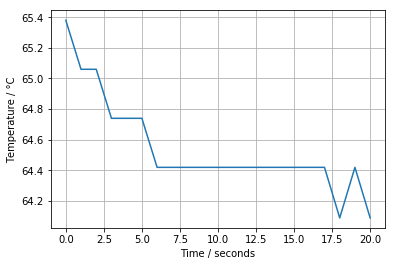

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

t, T1, T2, Q1, Q2 = h.fields 
plt.plot(t, T1)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()

The entire data history is available from the historian as the attribute `.log`. Here we show the first three rows from the log:

In [3]:
h.log[:3]

[(0, 65.38, 40.24, 0.0, 0.0),
 (0, 65.38, 40.24, 100.0, 0.0),
 (1.0, 65.06, 40.24, 100.0, 0.0)]

A sample code demonstrating how to plot the historian log.

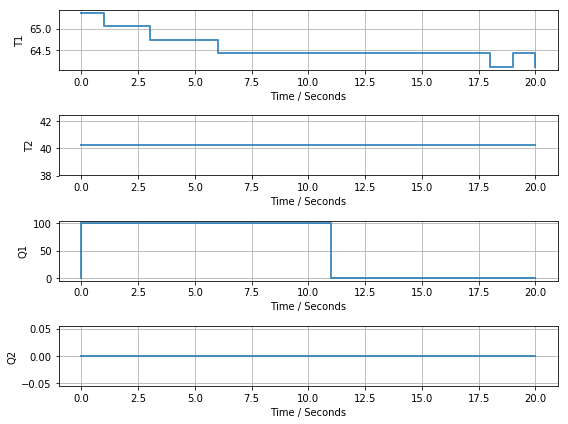

In [4]:
def plotlog(historian):
    line_options = {'lw': 2, 'alpha': 0.8}
    fig = plt.figure(figsize=(8, 6))
    nplots = len(h.columns) - 1
    t = historian.fields[0]
    for n in range(1, nplots+1):
        plt.subplot(nplots,1,n)
        y = historian.fields[n]
        plt.step(t, y, where='post', **line_options)          
        plt.grid()
        plt.xlabel('Time / Seconds')
        plt.ylabel(historian.columns[n])
    plt.tight_layout()
    
plotlog(h)

### Accessing log data via Pandas

Here's an example of how the log can be converted to a Pandas dataframe.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.head()

,T1,T2,Q1,Q2
Time,,,,
0.0,65.38,40.24,0.0,0.0
0.0,65.38,40.24,100.0,0.0
1.0,65.06,40.24,100.0,0.0
2.0,65.06,40.24,100.0,0.0
3.0,64.74,40.24,100.0,0.0


The following cells provide examples of plots that can be constructed once the data log has been converted to a pandas dataframe.

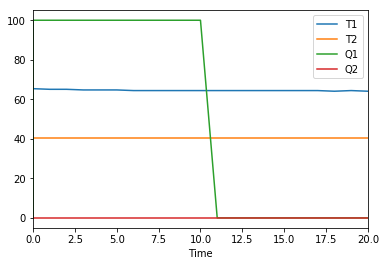

In [6]:
df.plot()

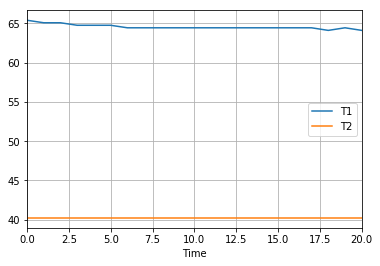

In [7]:
df[['T1','T2']].plot(grid=True)